# *Preprocessing*

##*Import  Moduls*

In [ ]:
# Import Modules
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
import missingno as msno

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

##*Import* Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/main/data/Ashrae_Energy_Mean.csv")

## Informasi Data

In [ ]:
#Melihat 5 awal data
data.head(5)

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [ ]:
#Melihat tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


In [ ]:
data.describe()

,meter_reading,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1413.000000,1413.000000,663.000000,352.000000,1413.000000,1396.000000,1413.000000,1237.000000,1324.000000,1413.000000,1413.000000
mean,185.383188,92204.792640,1968.170437,3.738636,15.697154,2.166618,8.259831,1.187860,1016.466990,175.351051,3.564617
std,374.899500,111412.340117,31.026539,3.336731,5.416736,1.461644,4.625295,1.478667,1.921973,24.921236,0.737746
min,0.000400,283.000000,1900.000000,1.000000,7.572136,0.059266,-0.304675,0.155325,1011.436563,123.388701,2.157103
25%,27.224943,22949.000000,1949.500000,1.000000,11.058629,0.665832,4.512823,0.775686,1016.404579,153.629430,3.100911
50%,74.933148,57673.000000,1970.000000,3.000000,15.204244,2.083712,8.285693,0.895980,1016.797495,184.295922,3.619547
75%,182.884848,115288.000000,1995.500000,5.000000,21.325261,2.998727,9.834399,1.033215,1017.949437,187.301104,3.905433
max,5072.323426,875000.000000,2017.000000,26.000000,24.963702,5.671785,17.379328,11.675633,1018.052063,207.134076,5.493939


## Penanganan *Missing Value*

In [ ]:
#Melihat jumlah *missing value* antar kolom

data.isnull().sum()

,0
meter_reading,0
primary_use,0
square_feet,0
year_built,750
floor_count,1061
air_temperature,0
cloud_coverage,17
dew_temperature,0
precip_depth_1_hr,176
sea_level_pressure,89


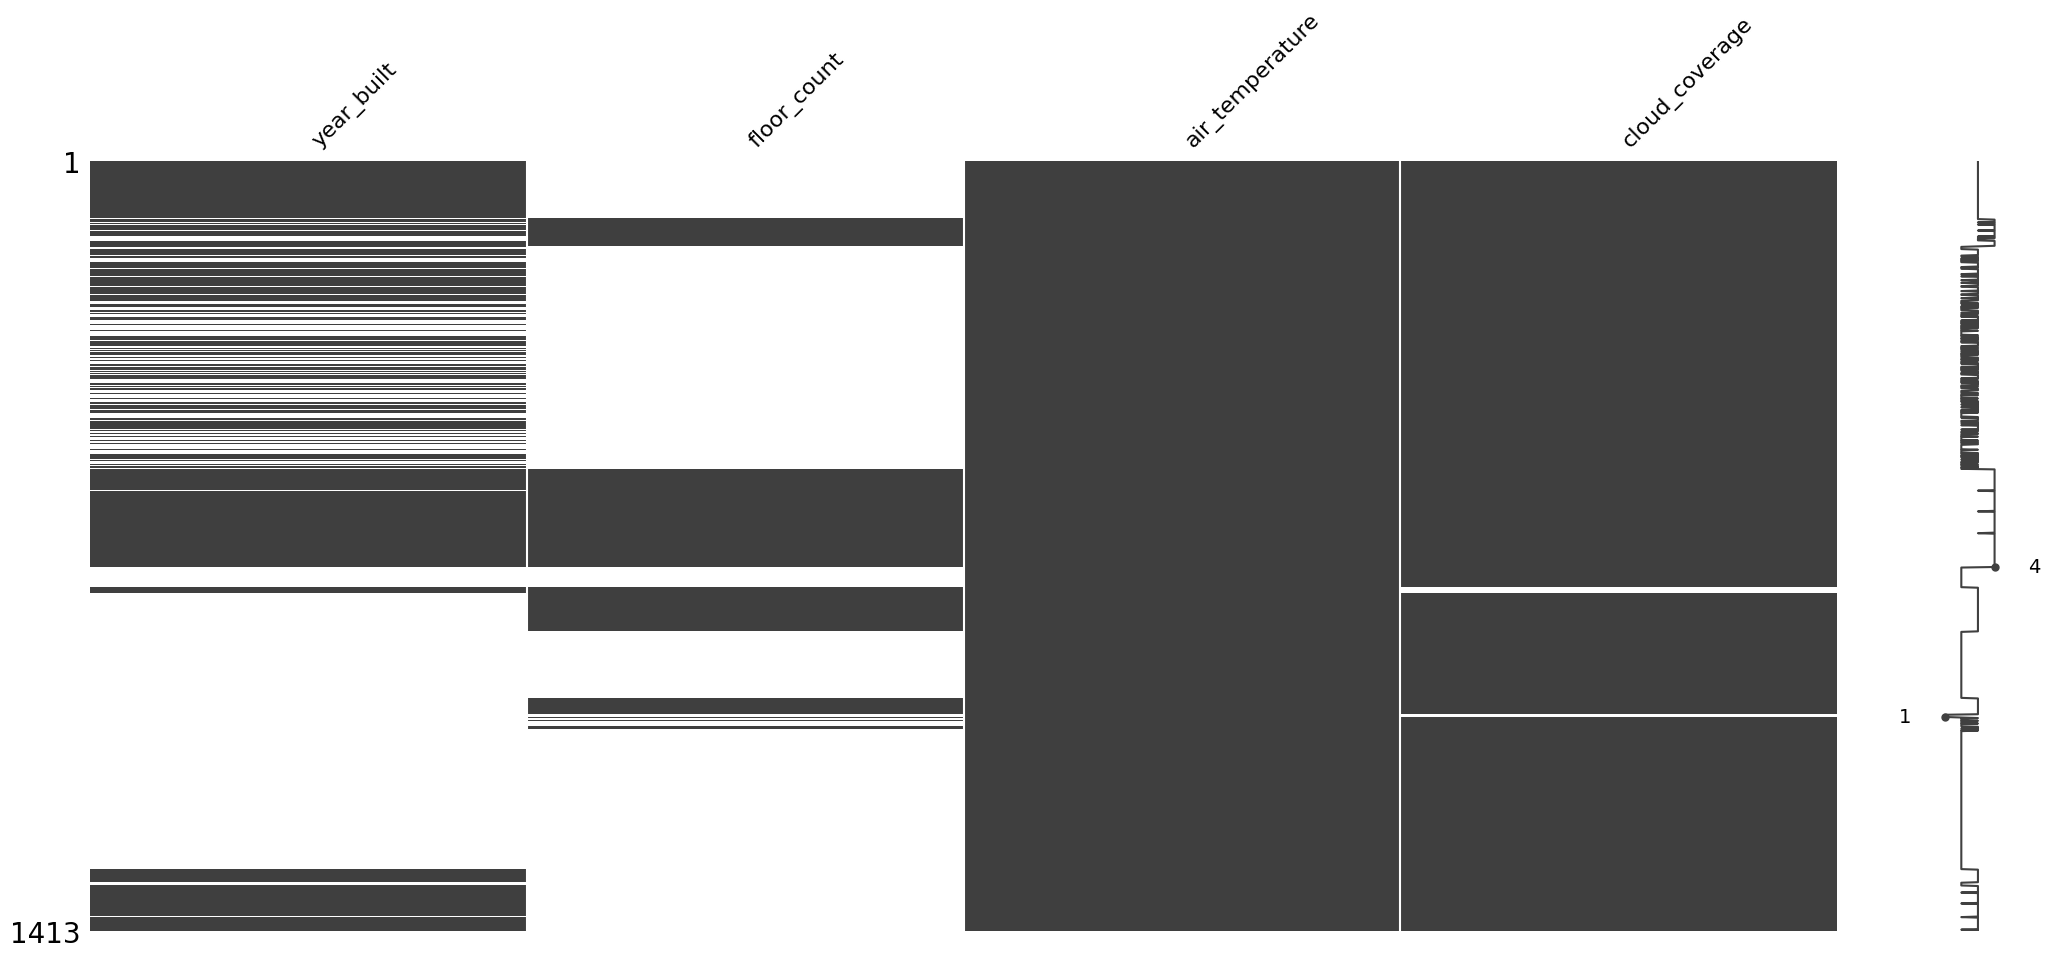

In [ ]:
#Menganlisis *pattern* dari *missing values*
msno.matrix(data[['year_built', 'floor_count', 'air_temperature', 'cloud_coverage']])
plt.show()

TOLONG RAPIHIN LAGI PENJELASANNNYA


1.  year_built

Terlihat warna putih pada kolom ini menunjukkan bahwa hampir setengah dari data pada kolom hilang dan garis padat pada setengah bagian lainnya menunjukkan ke randoman yang cukup acak. Atas alasan analisis ini, maka kolom ini akan dihapus.

2.  floor_count

Missing pada kolom ini tidak sepenuhnya acak karena mungkin ada beberapa kondisi tertentu yang menyebabkan hilangnya *missing values* namun dikarenakan jumlah *missing values* yaitu 1061 dari 1413 *enteries* maka dipilih untuk menghapus kolom ini.

3.  air_temperature

Terlihat warna hitam yang memblock visualisasi yang menandakan keacakan dari *missing values*.

4. cloud_coverage

Terlihat warna hitam yang memblock visualisasi yang menandakan keacakan dari *missing values*.



In [ ]:
#Drop year_built dan floor_count (kayaknya ga kepake di regresi)

data2 = data.drop(['floor_count', 'year_built'], axis=1)
data2.isnull().sum()

,0
meter_reading,0
primary_use,0
square_feet,0
air_temperature,0
cloud_coverage,17
dew_temperature,0
precip_depth_1_hr,176
sea_level_pressure,89
wind_direction,0
wind_speed,0


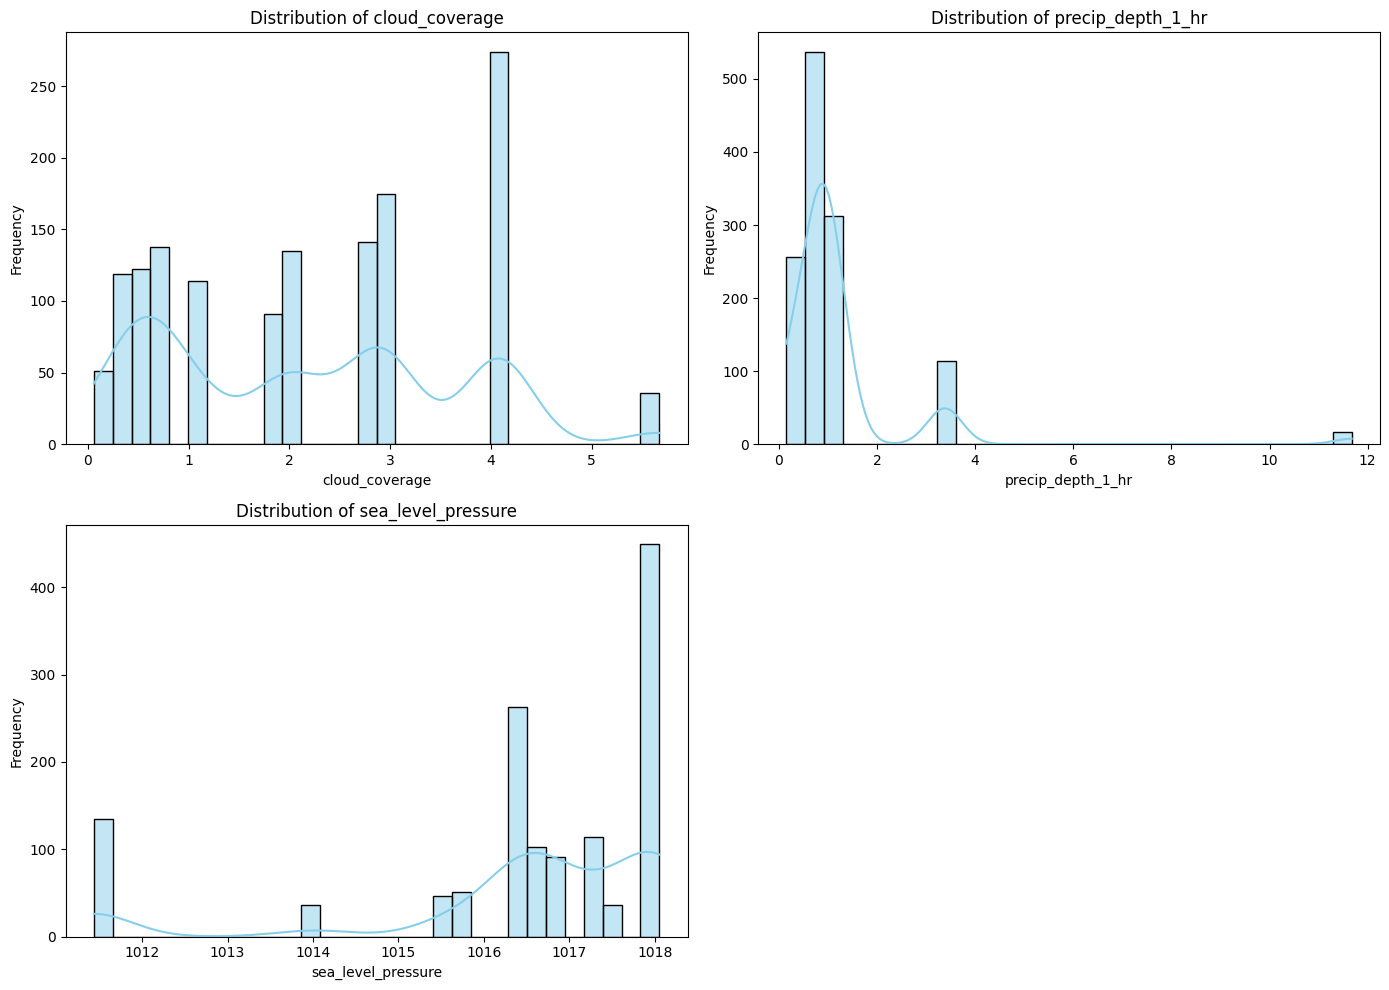

In [ ]:
#Melihat bentuk persebaran *missing values*
variabel_missval = ['cloud_coverage', 'precip_depth_1_hr', 'sea_level_pressure']

plt.figure(figsize=(14, 10))
for i, var in enumerate(variabel_missval, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[var], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
#Imputasi dengan median

data2['cloud_coverage'] = data2['cloud_coverage'].fillna(data2['cloud_coverage'].median())
data2['precip_depth_1_hr'] = data2['precip_depth_1_hr'].fillna(data2['precip_depth_1_hr'].median())
data2['sea_level_pressure'] = data2['sea_level_pressure'].fillna(data2['sea_level_pressure'].median())

data2.isnull().sum()

,0
meter_reading,0
primary_use,0
square_feet,0
air_temperature,0
cloud_coverage,0
dew_temperature,0
precip_depth_1_hr,0
sea_level_pressure,0
wind_direction,0
wind_speed,0


## Penanganan Duplikasi Data

In [ ]:
print(data2.shape)
data2.duplicated().sum()

(1413, 10)


0

##Standardisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
variabel_numerik = data2.select_dtypes(include=['float64', 'int64']).columns
data2[variabel_numerik] = scaler.fit_transform(data[variabel_numerik])

data2.head()

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0.139729,Education,-0.761162,1.301551,0.569501,1.972356,0.035674,0.771606,-0.916412,-0.234778
1,-0.178323,Education,-0.803470,1.301551,0.569501,1.972356,0.035674,0.771606,-0.916412,-0.234778
2,-0.431620,Education,-0.779622,1.301551,0.569501,1.972356,0.035674,0.771606,-0.916412,-0.234778
3,0.526602,Education,-0.615229,1.301551,0.569501,1.972356,0.035674,0.771606,-0.916412,-0.234778
4,3.719089,Education,0.219104,1.301551,0.569501,1.972356,0.035674,0.771606,-0.916412,-0.234778


## Penanganan *Outlier*

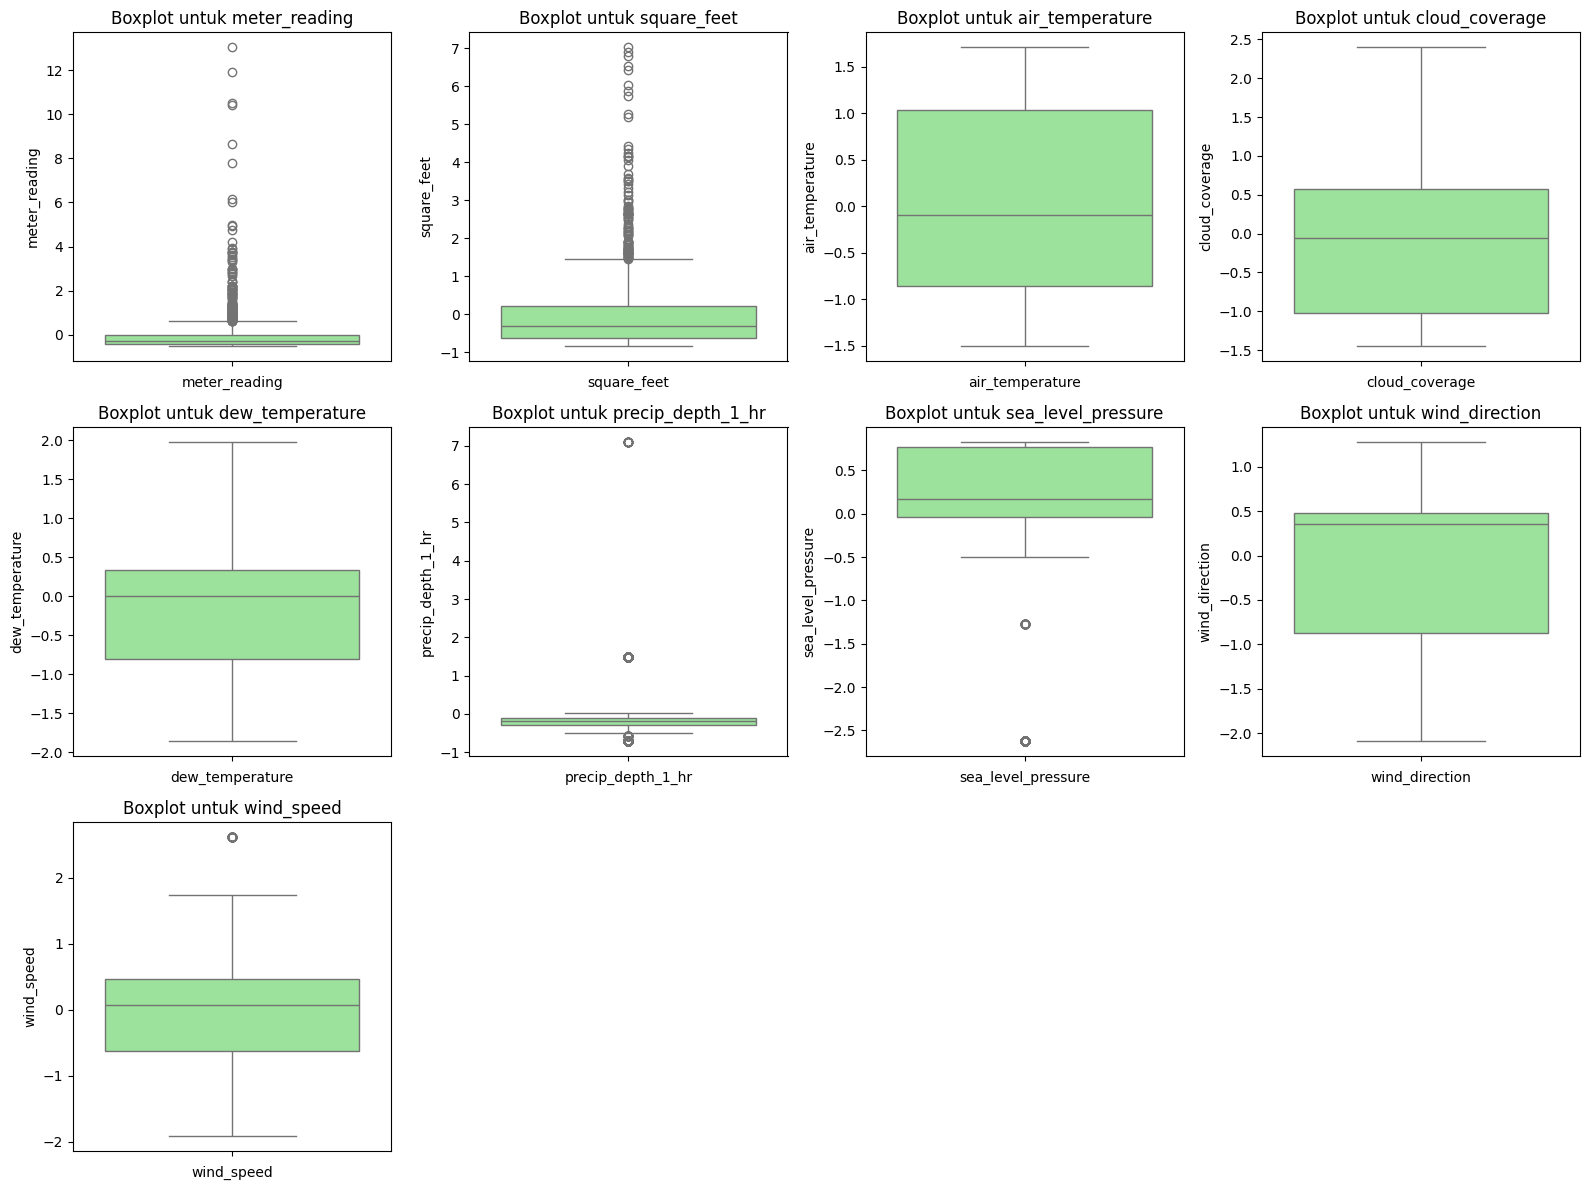

In [ ]:
# Visualisasi persebaran data numerik

data_numerik = data2.drop('primary_use', axis=1)

num_cols = 4
num_rows = (len(data_numerik.columns) + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols * 4, num_rows * 4))

for i, col in enumerate(data_numerik.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=data_numerik[col], color='lightgreen')
    plt.title(f'Boxplot untuk {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Terdapat permasalahan *outlier* yang cukup serius pada variabel `meter_reading` dan `square_feet`. Hal ini menjadi menarik dan akan dilakukan perbandingan antar model yang menggunakan *outliers* dan tidak pada pemodelan regresi.






#EDA

##Heatmap Korelasi

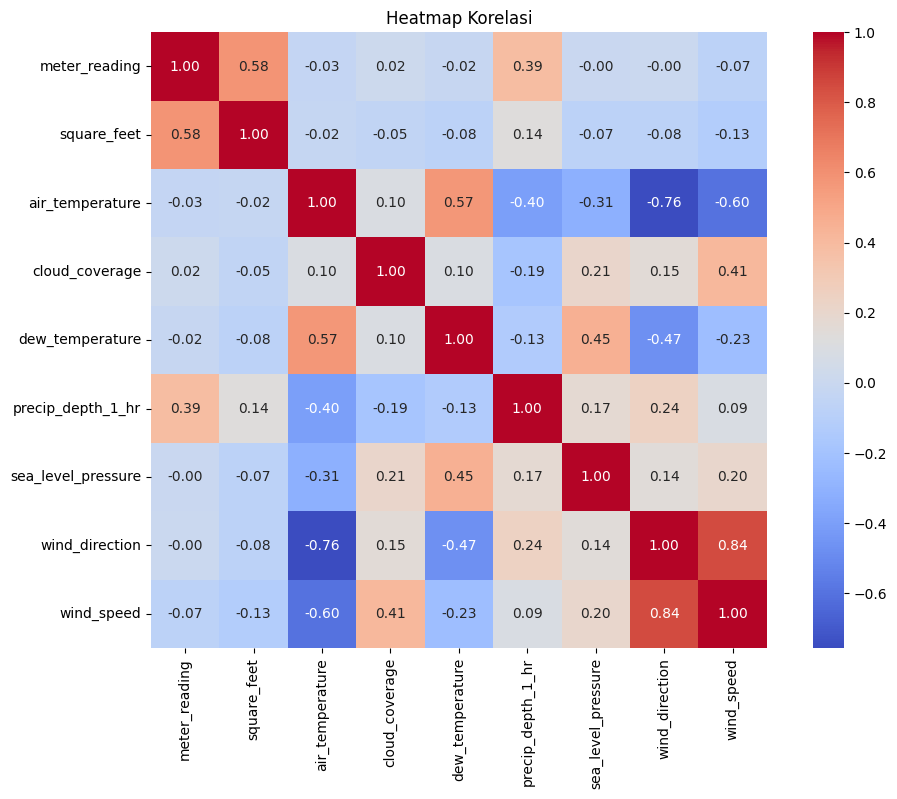

In [ ]:
#Heatmap korelasi

plt.figure(figsize=(12, 8))
variabel = data2.select_dtypes(include=['float64', 'int64'])
korelasi = variabel.corr()
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap Korelasi')
plt.show()

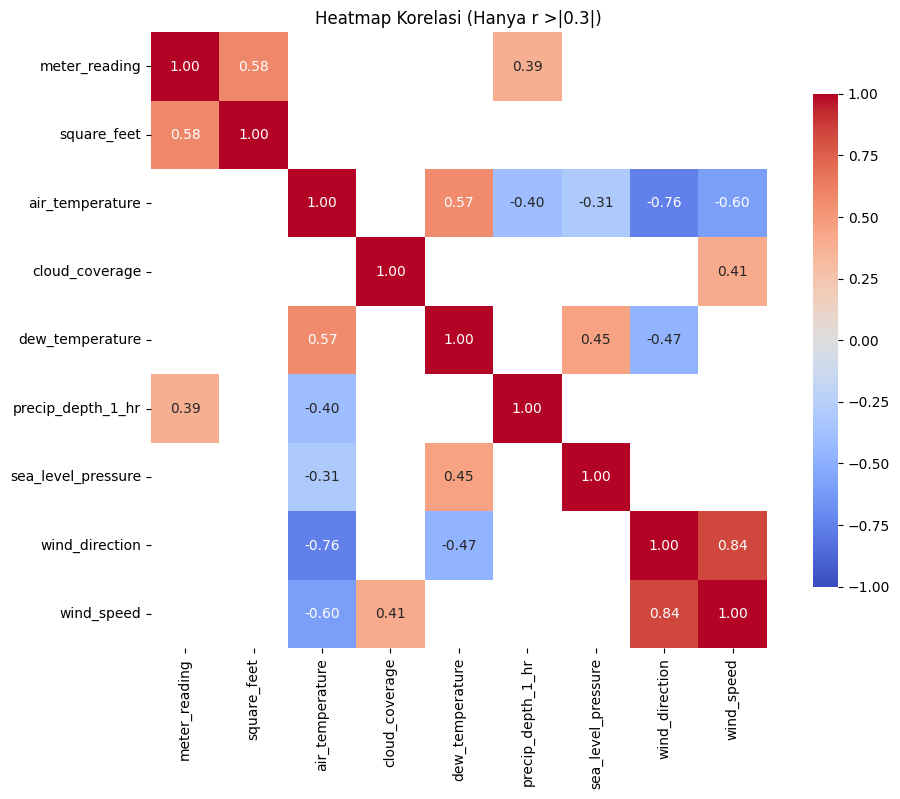

In [ ]:
#Heatmap buat yang r > 0.3 dan r < -0.3
mask = (korelasi < 0.3) & (korelasi > -0.3)

plt.figure(figsize=(12, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f", square=True, mask=mask, vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.title('Heatmap Korelasi (Hanya r >|0.3|)')
plt.show()

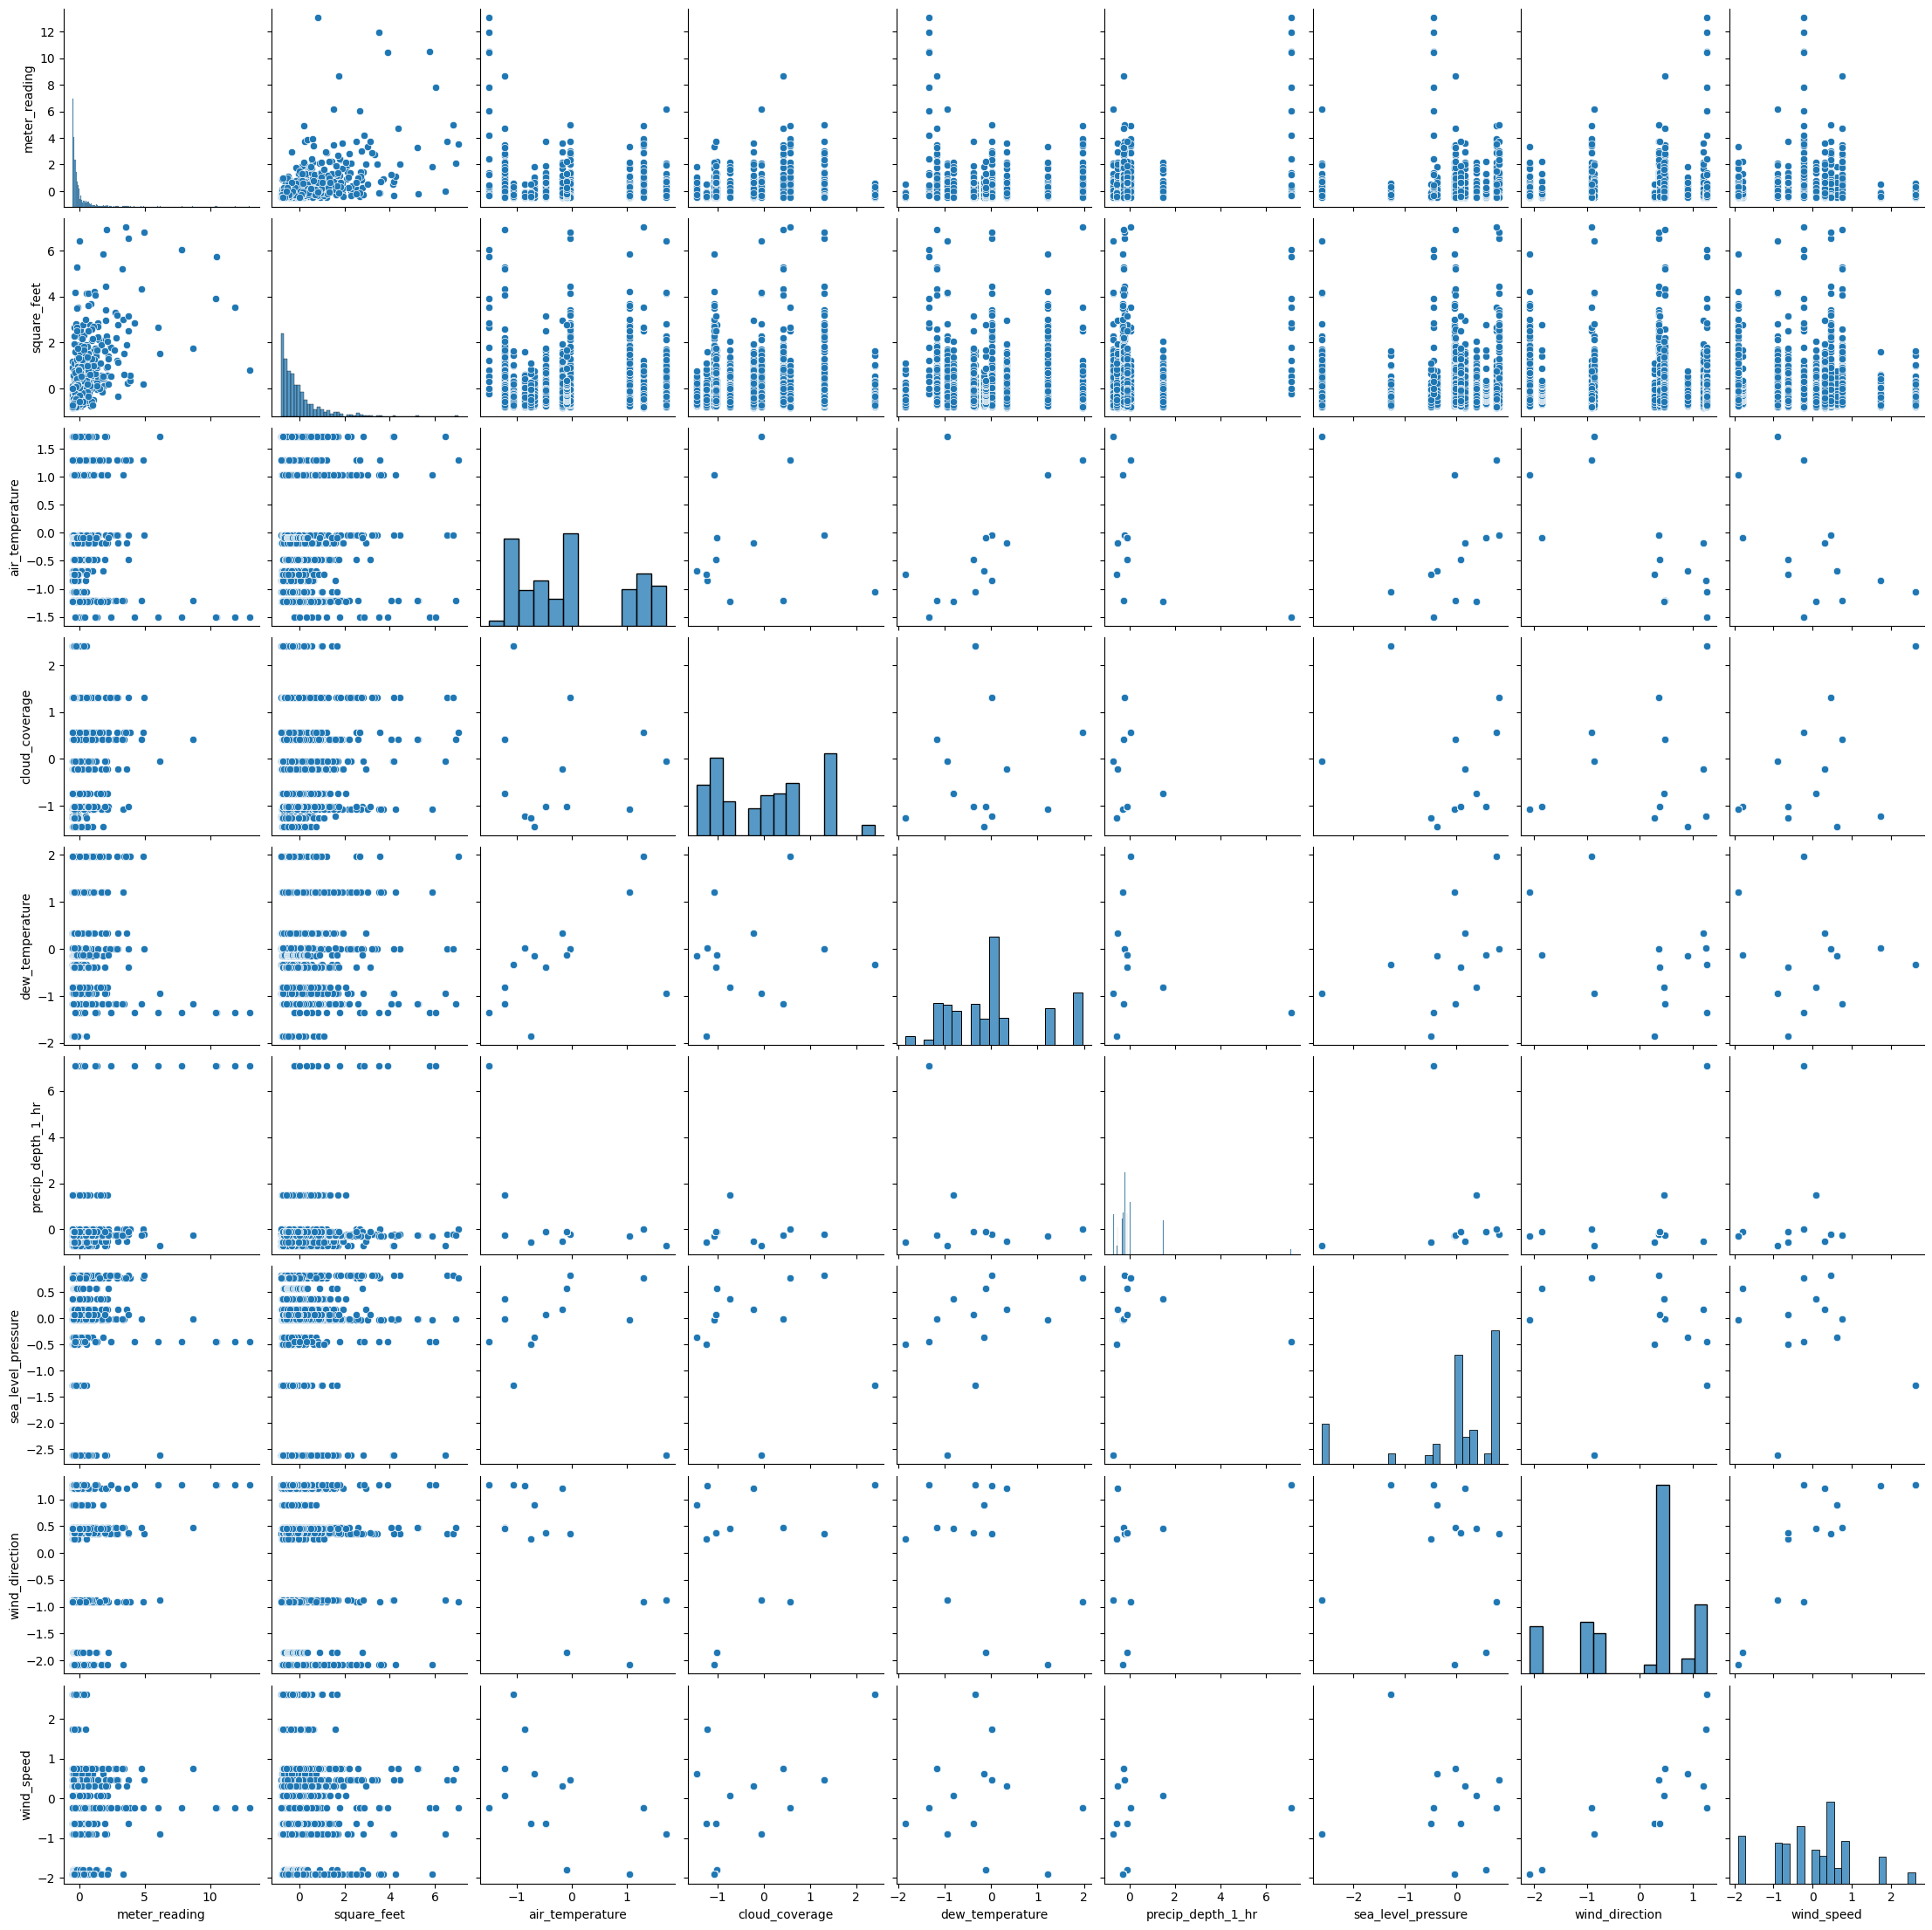

In [ ]:
pairplot = sns.pairplot(data2)
plt.show()

<Axes: xlabel='meter_reading', ylabel='Count'>

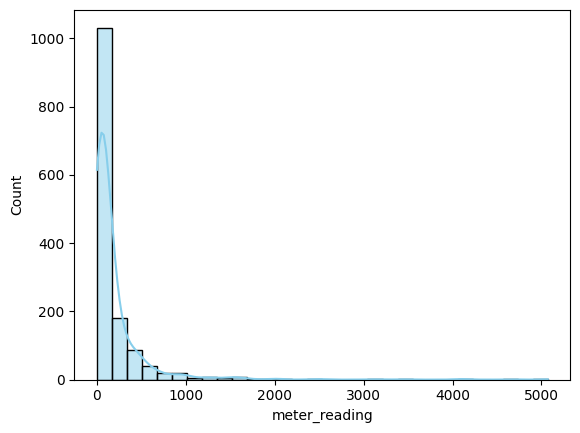

In [ ]:
sns.histplot(data['meter_reading'], bins=30, kde=True, color='skyblue')